# 7. Probability Distributions and Drive Thrus

## Introduction
```{admonition} Introduction

In the section, we show how random numbers are used to simulate a fast food restaurant with a drive thru order window  as illustrated in the animation below. 
```

For an explanation how to create this animation, see the section [Python Programming Guide:Classes and Objects](../../Programming/Introduction_to_Python:Classes and Objects).

<img src="drivethru.gif" width="750" align="center">

```{admonition} For Discussion

Suppose you are the owner of a fast food restaurant. Currently there is one drive up lane, but you are considering adding a second drive-up lane.  What factors need to be considered in making a decision whether to add a second drive-up lane?

```

```{index}statistical simulation model
```

A statistical simulation model uses data of customer arrival and ordering times to re-create a scenario and explore options such as adding a second drive thru lane. (For example, see https://blog.promodel.com/2013/07/10/fast-food-drive-thru-2-lanes-faster-than-1/)

Calculus is used in  statistically-based simulations since probabilities are represented as areas under curves called probability distributions.  

Here we will focus on the use of uniform (constant) and exponential distributions to model arrival times of customers.

```{index}distributions
```

## Distributions

A computer simulation of 1 versus 2 drive up lanes uses probabilities computed using definite integrals. The probability that some timed event $X$ occurs between $t=a$ and $t=b$ is given by

$prob(a\le X \le b) =\int_a^b f(t)\, dt$


Example 1 Suppose the time to place an  order is given by U(20,80)=$\frac{1}{100}$ meaning there is equal likelihood that the time will be between 20 and 100 seconds. Find the probability that the length of the next order is between 25 and 35 seconds.

Solution: probability=$\int_{25}^{35} f(t) dt = \int_{25}^{35} \frac{1}{100} dt = \frac{t}{100}\mid_{25}^{35}=\frac{35}{100}-\frac{25}{100}=\frac{10}{100}=\frac{1}{10}. $

Text(0.5, 0, 'Order Time t (seconds)')

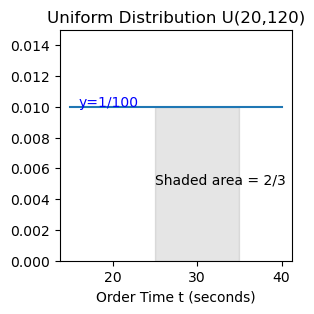

In [1]:
import numpy as np
import matplotlib.pyplot as plt
f= lambda t:0*t+1/100
x=np.linspace(14.95,40,20)
y=f(x)
plt.figure(figsize=(3,3))
plt.plot(x,y)
plt.ylim((0,.015))
plt.bar(25,1/100,10,alpha=0.1,align='edge',color='k',edgecolor='k')
plt.title('Uniform Distribution U(20,120)')
plt.text(25,.005,'Shaded area = 2/3')
plt.text(16,.01,'y=1/100',color='b')
plt.xlabel('Order Time t (seconds)')

```{index}exponential distribution
```

Example 2a) An exponential distribution has the form $f(t)=ke^{kt}$ ($0\le t \le \infty$) where the parmeter $k$ is such that the mean is $1/k$. Suppose the time to the next car arriving at the drive up is given by E(1) (i.e. k=1 so the mean is 1 minute). What is the probability that the next arrival is within 3 minutes.

 Solution.  probability = $\int_0^3 e^{-t}\,dt= - e^{-t}\mid_0^3= -e^{-3}+e^0=1-e^{-3}\approx .95.$


Text(0.5, 0, 'Time t to next arrival (seconds)')

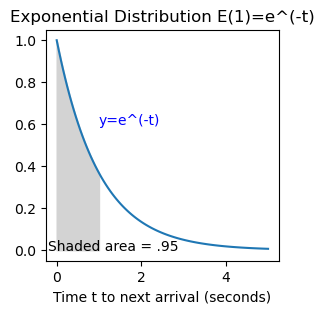

In [2]:
import numpy as np
import matplotlib.pyplot as plt
f= lambda t: np.exp(-t)
x=np.linspace(0,5,100)
y=f(x)
plt.figure(figsize=(3,3))
plt.plot(x,y)
x1=np.linspace(0,1,10)
y1=f(x1)
plt.fill_between(x1,y1,color='lightgray')
plt.title('Exponential Distribution E(1)=e^(-t)')
plt.text(-.2,0,'Shaded area = .95')
plt.text(1,.6,'y=e^(-t)',color='b')
plt.xlabel('Time t to next arrival (seconds)')

Example 2b) Find the value of $k$ so that there is a 25% chance (probability=.25) that the next car will arrive within 1 minute.

 Solution  $\int_0^1 k e^{-kt}\,dt = .25 \Rightarrow - e^{-kt}\mid_0^1=.25 \Rightarrow -e^{-k}+1=.25 \Rightarrow -e^{-k}=-.75\Rightarrow e^{-k}=.75.$ Take $\ln()$ of both sides, we have $-k=\ln(.75)\Rightarrow k=-\ln(.75)\approx .29.$

Example 3a) Using the value of $k$ given in 2b), find the probability $F(x)$ that the next car will arrive within $x$ minutes.

Solution 
$F(x)=\int_0^x .29 e^{-.29t}\,dt= -e^{-.29t}\mid_0^x = -e^{-.29x}+1.$ That is $F(x)=1-e^{-.29x}$

 Example 3b) Use your function in part a) to find the probability that the next car will arrive within 2 minutes.
 
Solution  
$F(2)=1-e^{-.29(2)}=1-e^{-.58}\approx .44$

```{index}random variables
```

## Use of Random Numbers

We will explain how a value $r$ generated by a PRNG (pseudo random numbe generator) can be converted into values of random variables such as

<ul>
    <li> A=length of time before the next car arrives at the parking lot</li>
    <li> O=length of time to place an order</li>
    <li> P=length of time to pay for the food</li>
    <li> F=length of time to pick up food</li>
    </ul>
        

### A=Length of time before next arrival

Let $X$ be a random variable giving the length of time (in minutes) until the next car arrives at the parking lot.
We assume $X$ is exponential distribution with mean $1/k=1$. In this case, the probability density function (pdf) is

$$
f(x)=ke^{-kx}=e^{-x}
$$


In [3]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,5,100)
f= np.exp(-t)  #standard (unit) normal distribution
plt.figure(figsize=(8, 4))
plt.plot(x,f,color='k',label="Probability Density Function f(x)")
plt.xlim((0,5))
plt.ylim((0,1))
plt.xlabel("t")
plt.grid()
plt.legend()
plt.show()

NameError: name 't' is not defined

The corresponding cumulative distribution function (cdf) is 

$$
F(t) = prob(0\le X \le t) = \int_0^t k e^{-kx}\,dx = - e^{-kx}\mid_0^t= -e^{-kt}+1=-e^{-t}+1.
$$

Here is a graph of this cdf:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(0,5,100)
F= 1-np.exp(-t)  #standard (unit) normal distribution
plt.figure(figsize=(8, 4))
plt.plot(t,F,color='k',label="Cumulative Distribution F(t)")
plt.xlim((0,5))
plt.ylim((0,1))
plt.xlabel("A=time to next arrival (in minutes)")
plt.grid()
plt.legend()
plt.show()

Note that the $F(t)=1-e^{-t}$ is an increasing function with a value of 0 at $t=0$ and a range $[0,1)$. 
As such, each random number $r$ $(0\le r <1)$  corresponds to a unique value of $A$:

$$
r=1-e^{-kA}\,\, \Rightarrow
$$

$$
e^{-kA}=1-r\,\, \Rightarrow 
$$

$$
-kA = \ln (1-r) \,\,\Rightarrow 
 $$
 
$$
A=-\frac{1}{k}\ln(1-r)=-\ln(1-r).
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(0,5,100)
F= 1-np.exp(-t)  #standard (unit) normal distribution
plt.figure(figsize=(8, 4))
plt.plot(t,F,color='k',label="Cumulative Distribution F(t)")
plt.xlim((0,5))
plt.ylim((0,1))
plt.text(-.15,.7,"r",color='r',size=15)
plt.text(-np.log(1-.7)-.07,-.05,"A=-ln(1-r)",color='r',size=15)
plt.plot([0,-np.log(.3),-np.log(.3)],[.7,.7,0],color='r')
plt.xlabel("A=time to next arrival (in minutes)")
plt.grid()
plt.legend()
plt.show()

### O=length of time to place an order

Let $X$ be a random variable giving the length of time (in seconds) to place an order.
We assume $X$ is uniformly distributed on the interval [15,45] (denoted U(30,15) where 30 is the length of the interval and 15 is the minimum value for $X$.) In this case, the probability density function (pdf) is

$$
f(x)=\frac{1}{30}\,\,(15\le x \le 45)
$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,50,1000)
f= (1/30)*(np.heaviside(x-15,0)-np.heaviside(x-45,0))   #standard (unit) normal distribution
plt.figure(figsize=(8, 4))
plt.plot(x,f,color='k',label="Probability Density Function f(x)")
plt.xlim((0,50))
plt.ylim((0,.05))
plt.xlabel("x")
plt.grid()
plt.legend()
plt.show()

The the cumulative distribution function (cdf) is 

$$
F(t) = prob(15\le X \le t) = \int_0^t \frac{1}{30}\,dx = - \frac{1}{30}x\mid_{15}^t= \frac{t}{30}-\frac{15}{30}=\frac{t-15}{30}
$$

Here is a graph of this cdf:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(15,45,100)
F= ((t-15)/30)*np.heaviside(t-15,0)  #U(30,15)
plt.figure(figsize=(8, 4))
plt.plot(t,F,color='k',label="Cumulative Distribution F(t)")
plt.xlim((15,45))
plt.ylim((0,1))
plt.xlabel("O=time to place order (in seconds)")
plt.grid()
plt.legend()
plt.show()

As before, the $F(t)=\frac{t-15}{30}$  $\,(15 \le t \le 45$) is an increasing function with a value of 0 at $t=15$ and a range $[0,1)$. 

As such, each random number $r$ $(0\le r <1)$  corresponds to a unique value of $O$  where $\,15 \le O\le 45$:

$$
r=\frac{O-15}{30}\,\, \Rightarrow
$$

$$
O-15=30r\,\, \Rightarrow 
$$

$$
O=15+30r.
 $$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(15,45,100)
F= ((t-15)/30)*np.heaviside(t-15,0) # U(30,15)
plt.figure(figsize=(8, 4))
plt.plot(t,F,color='k',label="Cumulative Distribution F(t)")
plt.xlim((15,45))
plt.ylim((0,1))
plt.text(15-.5,.7,"r",color='r',size=15)
plt.text(15+30*.7,-.05,"O=15+30r",color='r',size=15)
plt.plot([15,15+30*.7,15+30*.7],[.7,.7,0],color='r')
plt.xlabel("O=time to place order (in seconds)")
plt.grid()
plt.legend()
plt.show()


## Exercises

```{admonition} Exercises

1. An important probability function called the exponential distribution has the form

$$f(t) = k e^{-kt}  \hspace{.2in} (t \ge 0 \hspace{.1in} and \hspace{.1in} k>0).$$


 The exponential distribution is used to describe the amount of time until some event occurs such as the time to the next arrival of a car at a drive through window.  More specifically, the probability that the next car arrives somewhere between $t=a$ and $t=b$ minutes is given by the definite integral

$$
Prob(a\le t \le b) = \int_a^b f(t) dt  =  \int_a^b k e^{-kt}  \hspace{.05in} dt.$$


a) Suppose $k=1$.  Find the probability that the next car will arrive at the drive through within 2 minutes.
b) Using $k=1$, show that the probability that the next car will arrive between 0 and $\infty$ minutes is equal to 1 (i.e. there is a 100% chance another car will arrive some time in the future)
c) Find the value of $k$ such that there is a 50% chance (i.e. probability = .5) that the next car will arrive in one minute.
d) Using your answer to part c), find a function $F(x)$ which gives the probability that the next car will arrive within $x$ minutes. (In general, given a probability distribution function $f(t)$ defined on an interval $a\le x \le b$, the cumulative distribution function $F(x)$ is obtained by the definite integral $\int_a^x f(t) \hspace{.1in} dt$).
e) Use your answer to d) to find the probability that the next car will arrive within 3 minutes.

2. Let P=length of time to pay for an order of food.

a) Let $X$ be a random variable giving the length of time (in seconds) to pay for an order using cash. We assume $X$ is uniformly distributed on the interval [5,35] (denoted U(30,5) where 30 is the length of the interval and 5 is the minimum value for $X$ in seconds.) Explain how to use a pseudo random number to give a value for $P$.

b)  Let $X$ be a random variable giving the length of time (in seconds) to pay for an order using credit card. We assume $X$ is uniformly distributed on the interval [5,20] (denoted U(15,5) where 15 is the length of the interval and 5 is the minimum value for $X$ in seconds.) Explain how to use a pseudo random number to give a value for $P$.
 
3.  Let $F$ be the length of time to pick up food. Let $X$ be a random variable giving the length of time (in seconds) to pick up an order. We assume $X$ is uniformly distributed on the interval [30,90] (denoted U(60,30) where 60 is the length of the interval and 30 is the minimum value for $X$ in seconds.) Show how to use a pseudo random number to generate a value for $F$

4. Use random numbers to simulate arrivals at a one lane drive-thru. For simplicity, assume that:

<ul>
<li>the time $A$ between arrivals is exponentially distributed with mean $k$=1 (in minutes);</li>
<li>the order time $O$ is uniformly distributed on the interval $[15,45]$ (in seconds);</li>
<li>the pay time $P$ is unformly distributed on the interval $[5,25]$ (in seconds); and</li>
<li>the food pick-up time $F$ is uniformly distributed on the interval $[30,60]$ in seconds.</li>
</ul>

Find the mean total time to enter and be processed through the order-pay-pickup system.

Be sure to convert the time between arrivals to seconds and give the final mean total time in minutes.

Explore how the mean total time depends on system paramters.  For example you might vary the parameter $k$ for the arrival time A from k=.1 (mean=10 minutes) to 2 (mean = 1/2 minute) in increments of .1

```
